## 1. K-Nearest Neighbors

In [1]:
# câu 3
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the diabetes dataset
iris_X, iris_y = datasets.load_iris(return_X_y=True)

# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
    iris_X, 
    iris_y,
    test_size=0.2,
    random_state=42
)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predict and Evaluate test user
y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [2]:
# câu 5
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_X,
    diabetes_y,
    test_size=0.2,
    random_state=42
)

# scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# build KNN model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor()

In [3]:
# câu 7
import numpy as np
from datasets import load_dataset
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# load IMDB dataset
imdb = load_dataset('imdb')
imdb_train, imdb_test = imdb['train'], imdb['test']

# Convert text to vector using BoW
vectorizer = CountVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(imdb_train['text']).toarray()
X_test = vectorizer.transform(imdb_test['text']).toarray()
y_train = np.array(imdb_train['label'])
y_test = np.array(imdb_test['label'])

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Build KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
knn_classifier.fit(X_train, y_train)

# predict test set and evaluate
y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.60524

## 2. K-Means

In [4]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

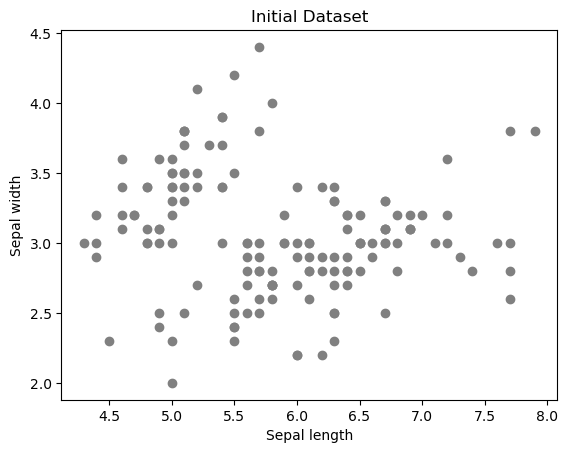

In [5]:
iris_dataset = load_iris()
data = iris_dataset.data
data = iris_dataset.data[:, :2]

# Plot data
plt.scatter(data[:, 0], data[:, 1], c='gray')
plt.title('Initial Dataset')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [6]:
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.clusters = None
    
    def initialize_centroids(self, data):
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))
    
    def assign_clusters(self, data):
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)
    
    def update_centroids(self, data):
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])
    
    def fit(self, data):
        self.initialize_centroids(data)

        for i in range(self.max_iters):
            self.clusters = self.assign_clusters(data)

            self.plot_clusters(data, i)

            new_centroids = self.update_centroids(data)

            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids
        
        self.plot_final_clusters(data)

    def plot_clusters(self, data, iteration):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title(f'Iteration {iteration + 1}')
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()
    
    def plot_final_clusters(self, data):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title('Final Clusters and Centroids')
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

In [7]:
kmeans = KMeans()
kmeans.initialize_centroids(data)
kmeans.centroids

array([[6.1, 2.8],
       [5.7, 3.8],
       [7.7, 2.6]])

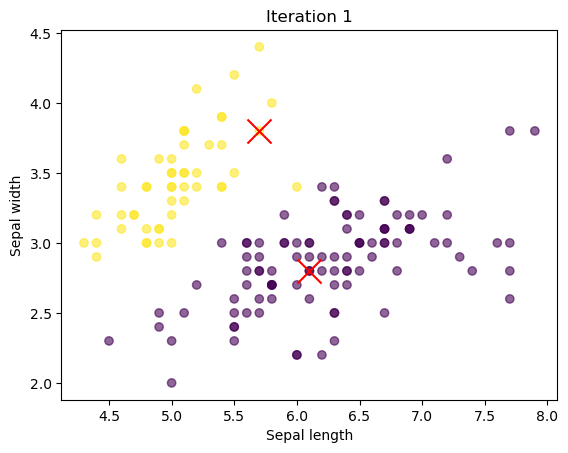

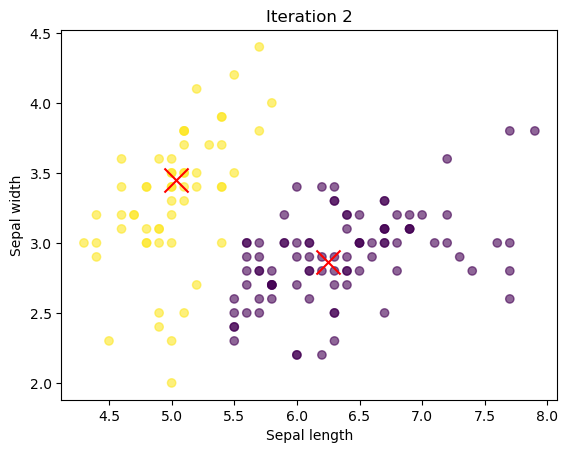

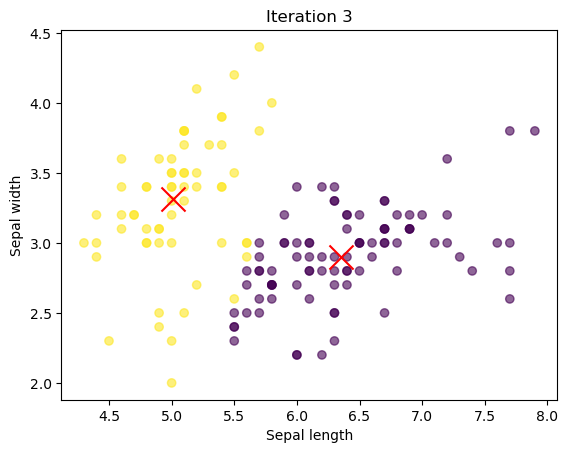

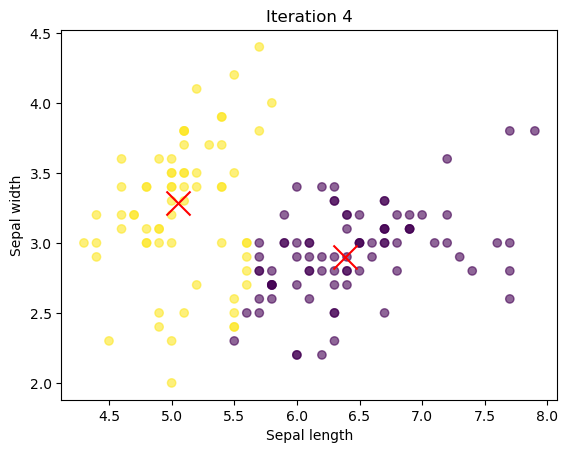

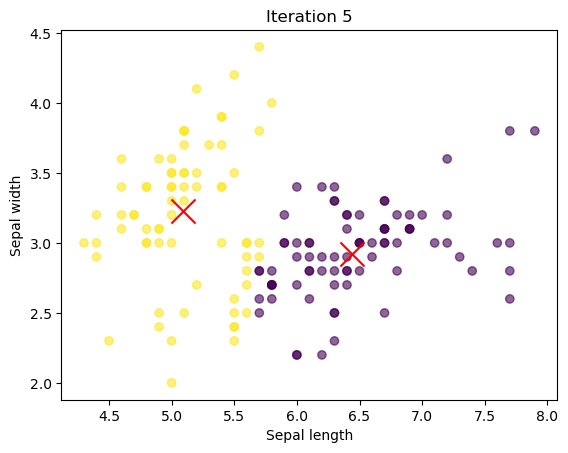

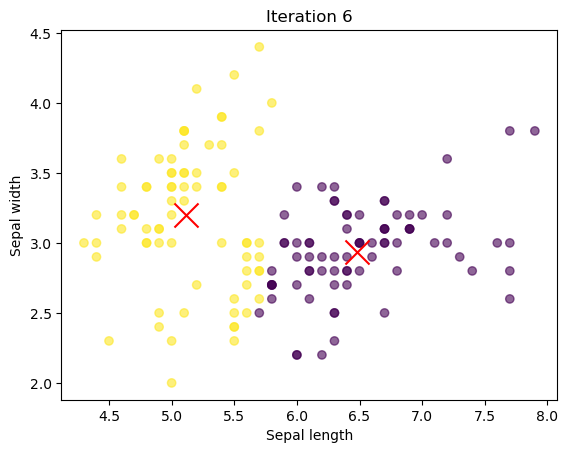

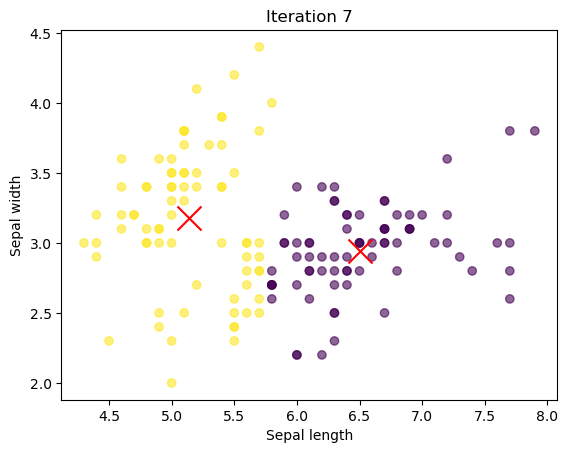

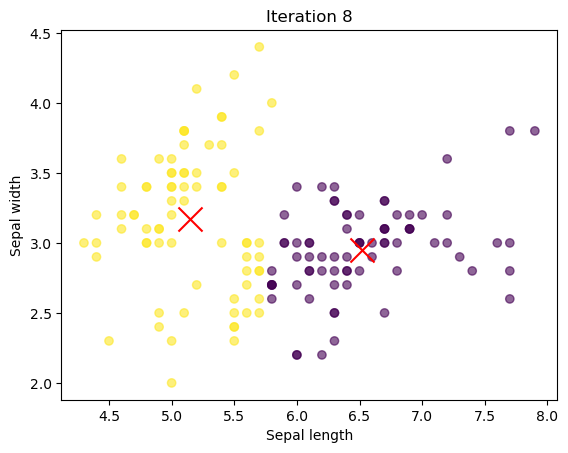

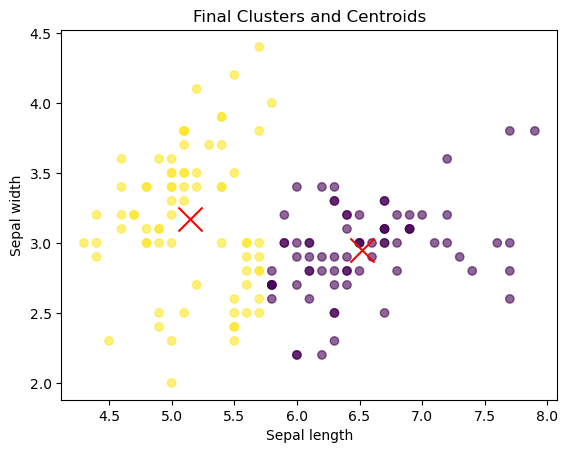

In [9]:
kmeans = KMeans(k=2)
kmeans.fit(data)

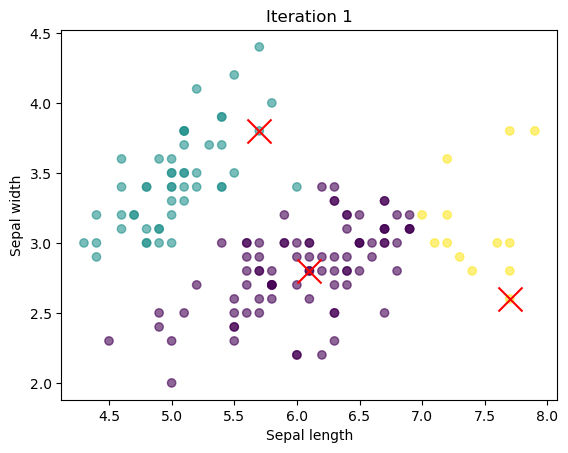

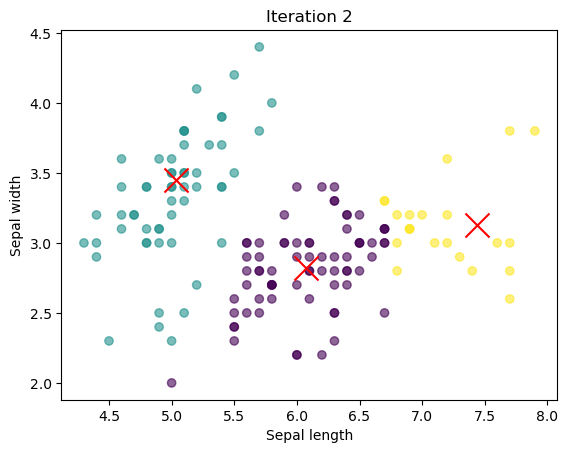

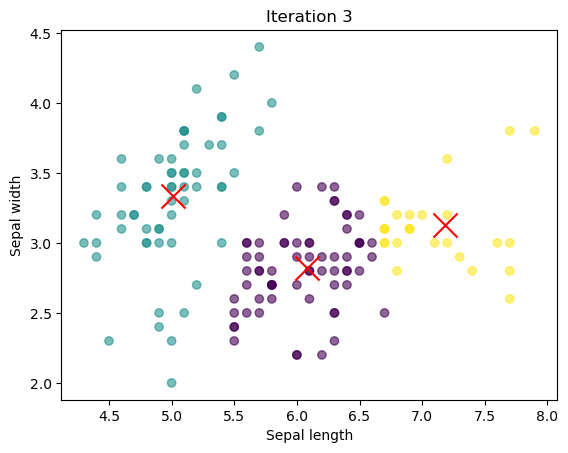

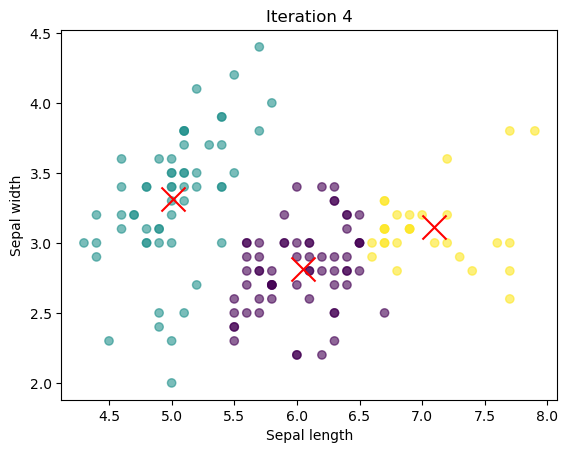

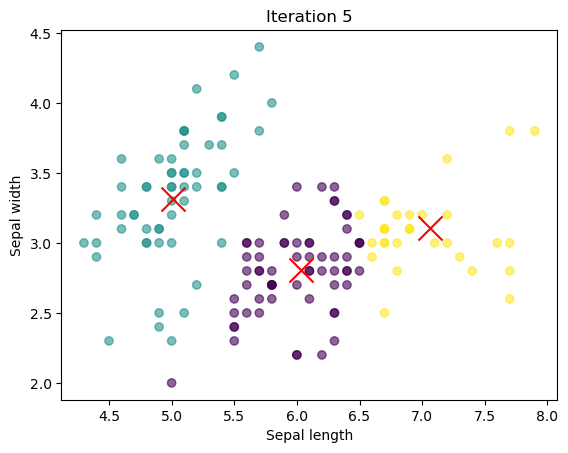

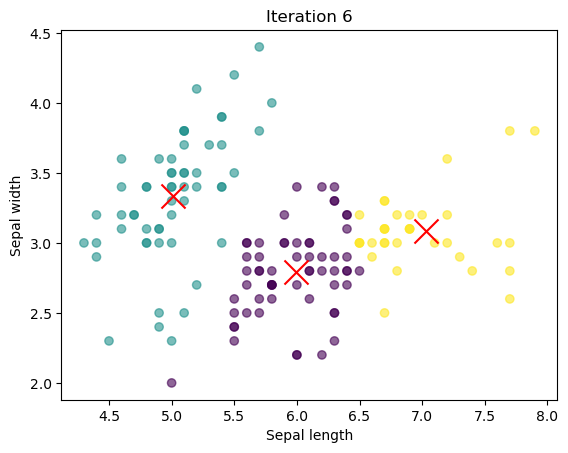

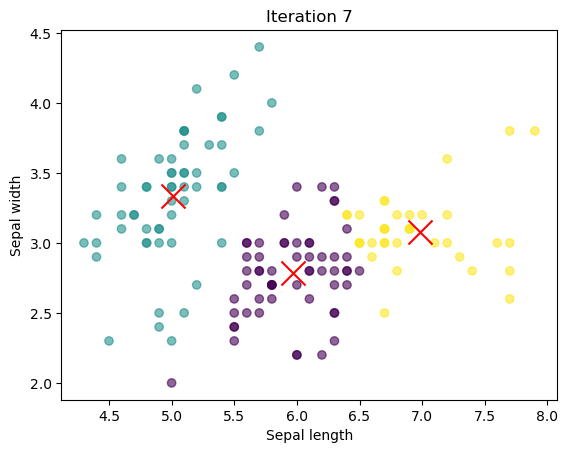

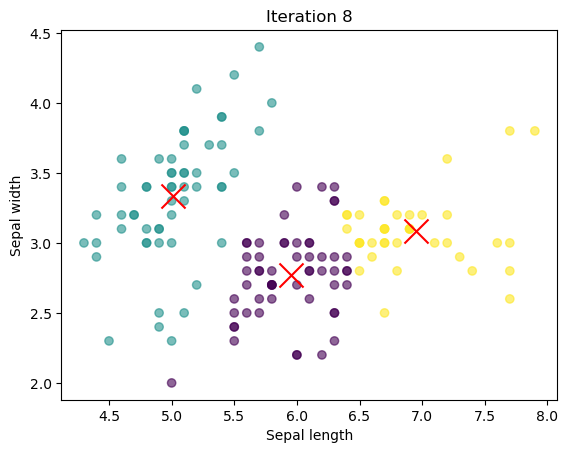

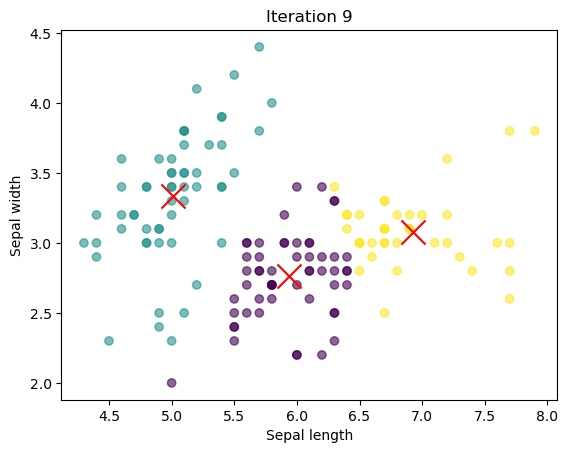

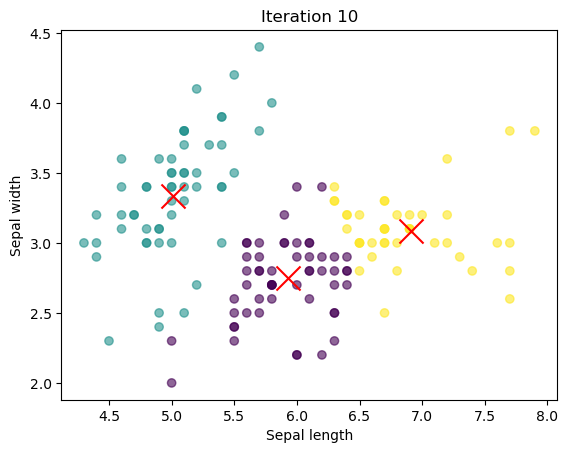

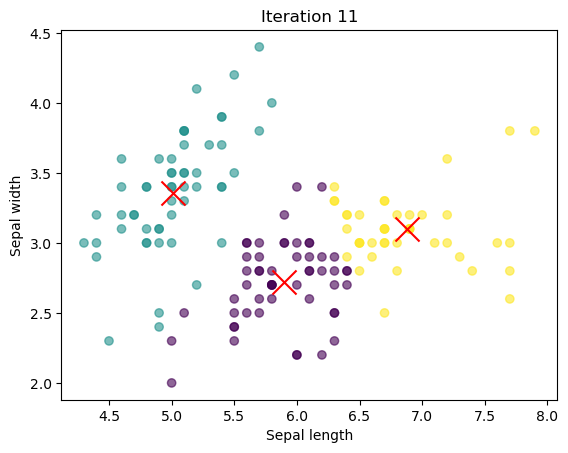

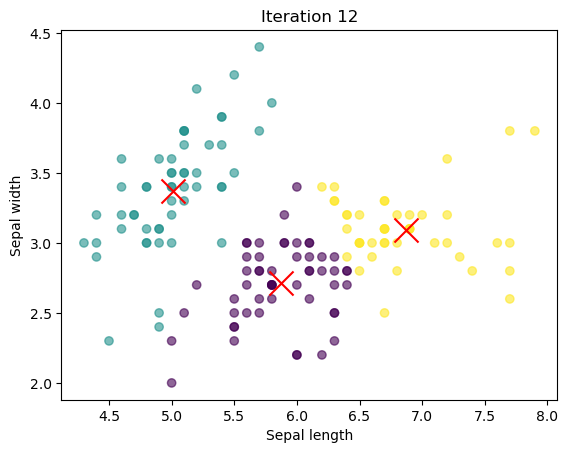

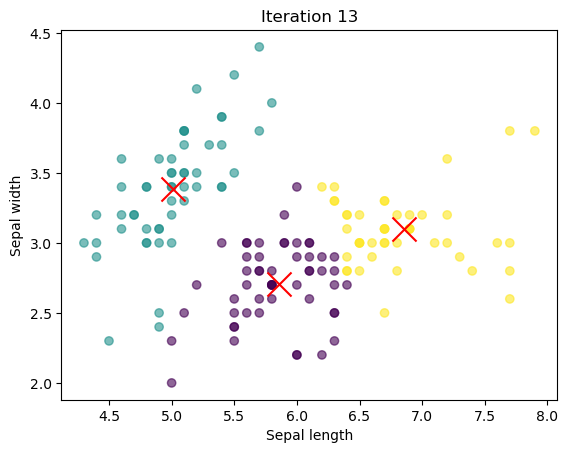

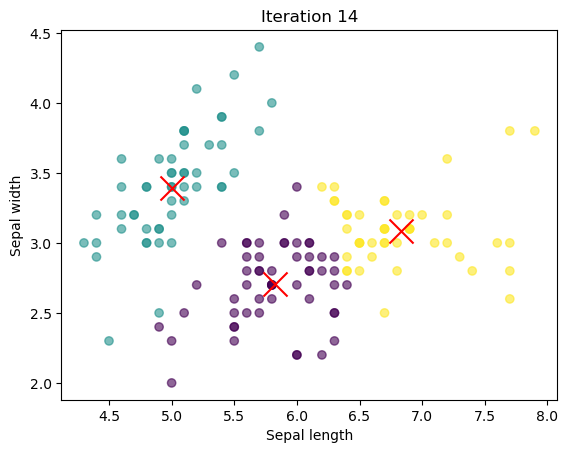

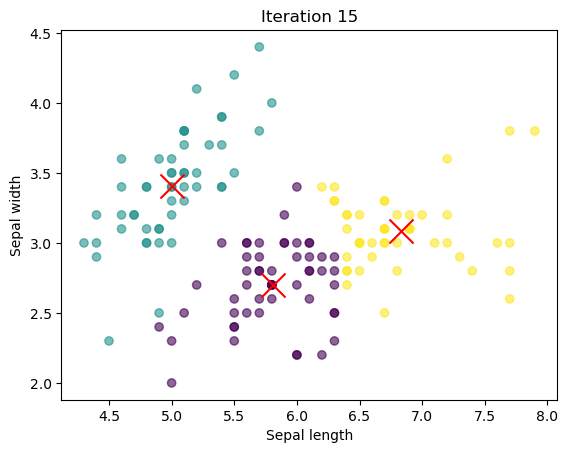

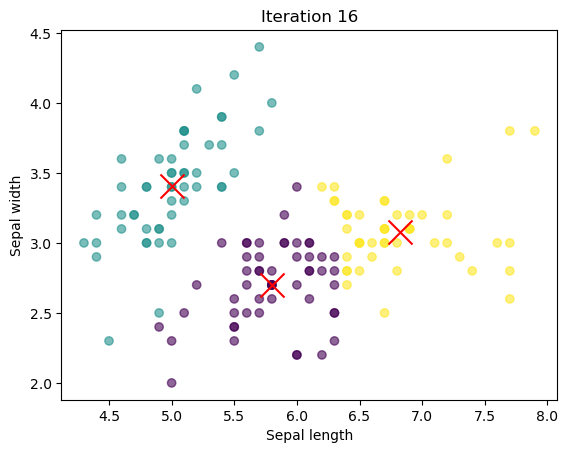

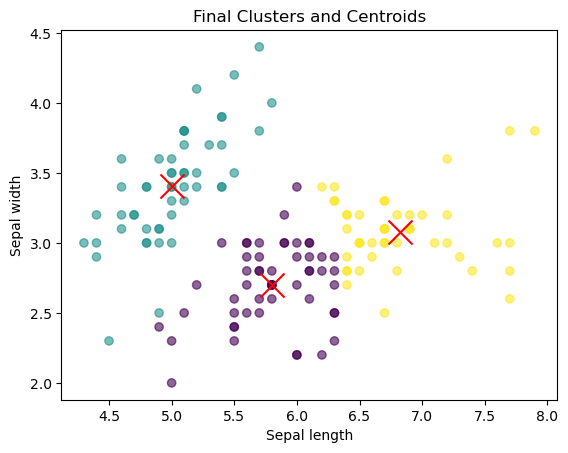

In [10]:
kmeans = KMeans(k=3)
kmeans.fit(data)

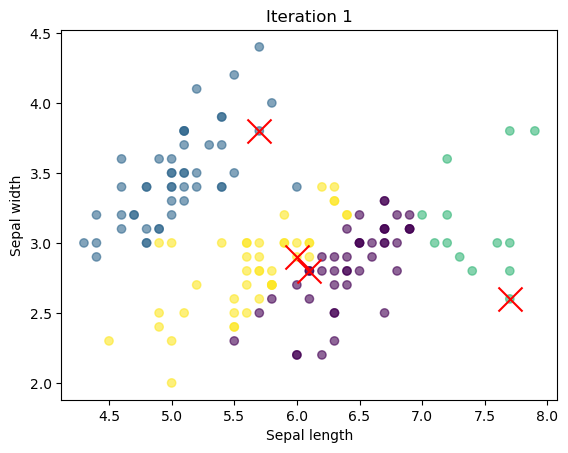

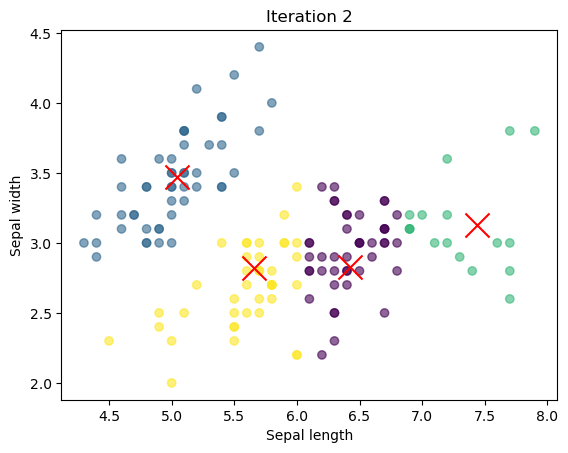

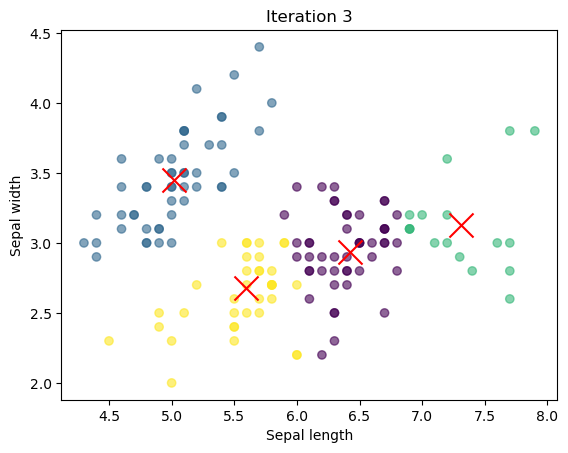

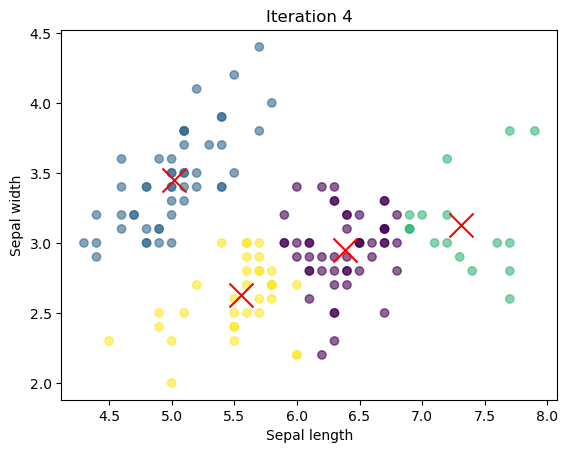

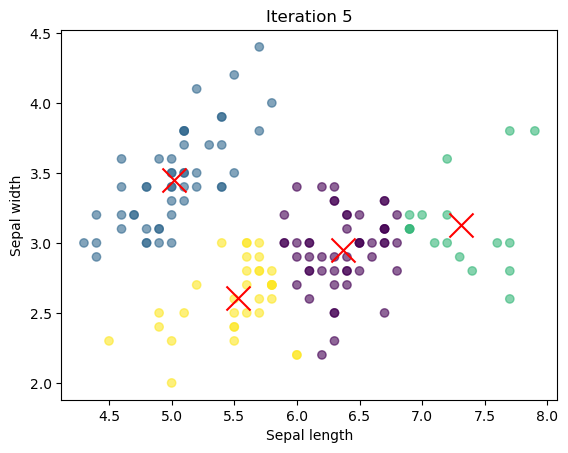

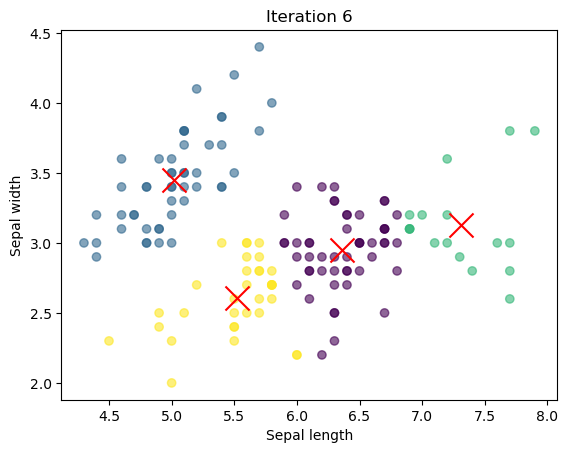

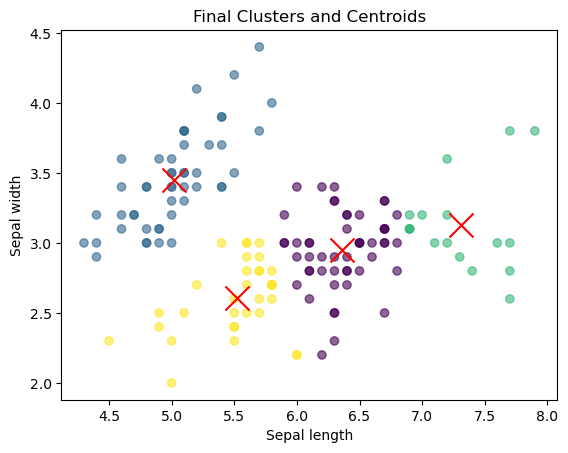

In [11]:
kmeans = KMeans(k=4)
kmeans.fit(data)

In [12]:
# new data
import pandas as pd

df_data = pd.DataFrame({
    'Feature 1': [2.0, 3.0, 3.5, 8.0, 8.5, 9.0, 1.0, 1.5],
    'Feature 2': [3.0, 3.5, 3.0, 8.0, 8.5, 8.0, 2.0, 2.5],
    'Feature 3': [1.5, 2.0, 2.5, 7.5, 8.0, 8.5, 1.0, 1.5]
})

In [13]:
data_new = df_data.to_numpy()
data_new

array([[2. , 3. , 1.5],
       [3. , 3.5, 2. ],
       [3.5, 3. , 2.5],
       [8. , 8. , 7.5],
       [8.5, 8.5, 8. ],
       [9. , 8. , 8.5],
       [1. , 2. , 1. ],
       [1.5, 2.5, 1.5]])

In [14]:
kmeans = KMeans(2)
kmeans.initialize_centroids(data_new)
kmeans.centroids

array([[3. , 3.5, 2. ],
       [9. , 8. , 8.5]])

In [15]:
# câu 9
kmeans.euclidean_distance(np.array([3.0, 3.5, 2.0]), np.array([9. , 8. , 8.5]))

9.924716620639604

In [16]:
# câu 10
distance_1 = kmeans.euclidean_distance(np.array([3.0, 3.5, 2.0]), np.array([3. , 3.5, 2. ]))
distance_2 = kmeans.euclidean_distance(np.array([2.0, 3.0, 1.5]), np.array([8.0, 8.0, 7.5]))
print('distance 1', distance_1)
print('distance 2', distance_2)

distance 1 0.0
distance 2 9.848857801796104


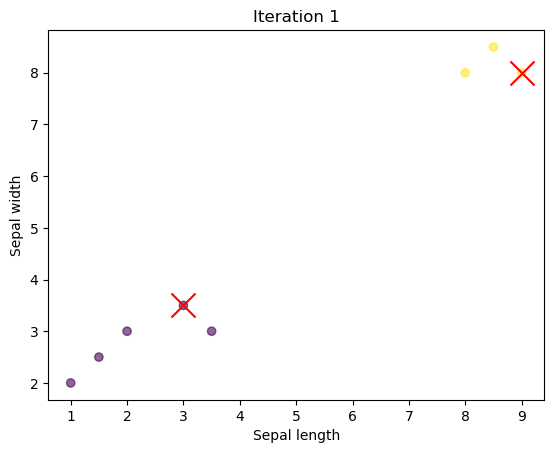

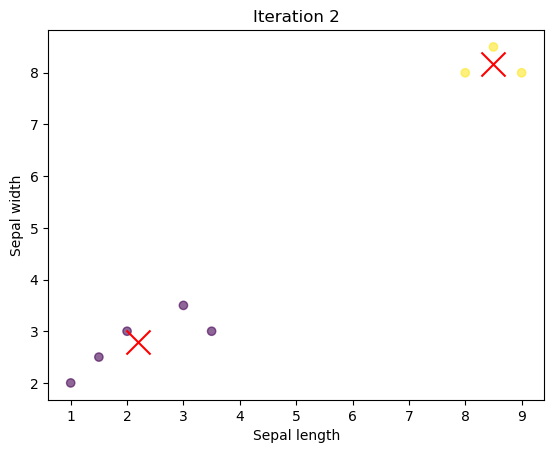

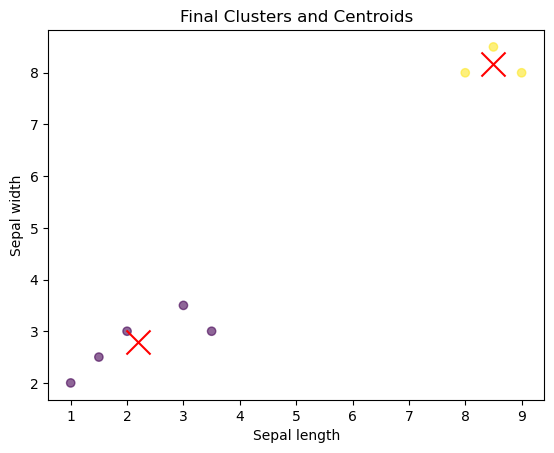

[[2.2        2.8        1.7       ]
 [8.5        8.16666667 8.        ]]


In [18]:
# câu 13
kmeans.fit(data_new)
print(kmeans.centroids)